Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import librosa
from IPython.display import display, Audio
import soundfile as sf

In [2]:
genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
for id, genre in enumerate(genres):
    for i in range(100):
        try:
            x, sr = sf.read(f'../Data/genres_original/{genre}/{genre}.000{i:02}.wav')
        except RuntimeError as e:
            print("No se pudo leer con soundfile:", e)

No se pudo leer con soundfile: Error opening '../Data/genres_original/jazz/jazz.00054.wav': Format not recognised.


In [3]:
lens = []
durations = []
srs = []
for id, genre in enumerate(genres):
    for i in range(100):
        if not (i == 54 and genre == 'jazz'):
            x, sr = sf.read(f'../Data/genres_original/{genre}/{genre}.000{i:02}.wav')
            lens.append(len(x))
            durations.append(len(x)/sr)
            srs.append(sr)
pd.DataFrame(np.array([lens, durations, srs]).T, columns=['lens', 'durations', 'srs']).describe()

lens   durations      srs
count     999.000000  999.000000    999.0
mean   662030.764765   30.024071  22050.0
std      1784.965742    0.080951      0.0
min    660000.000000   29.931973  22050.0
25%    661504.000000   30.000181  22050.0
50%    661794.000000   30.013333  22050.0
75%    661794.000000   30.013333  22050.0
max    675808.000000   30.648889  22050.0

Frecuencia de muestreo: 22050
Duración de la señal: 30.013333333333332


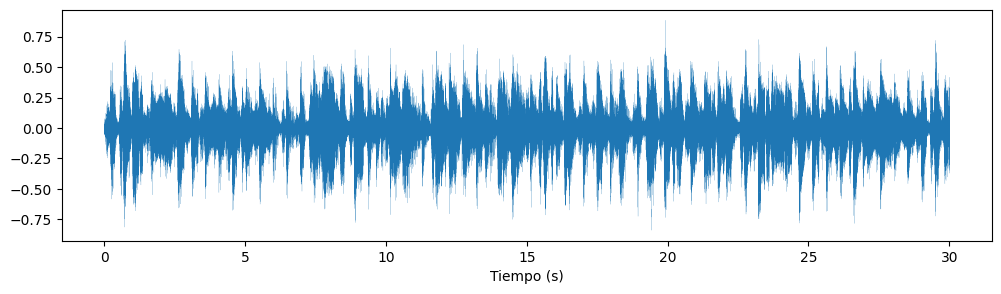

In [4]:
x, sr = sf.read('../Data/genres_original/blues/blues.00000.wav')
print("Frecuencia de muestreo:",sr)
print("Duración de la señal:",len(x)/sr)

t = np.arange(len(x)) / sr
plt.figure(figsize=(12, 3))
plt.plot(t, x, lw=0.1)  # use 'lw' (linewidth) instead of 'wh'
plt.xlabel('Tiempo (s)')

Audio(x, rate=sr)

Frecuencia de muestreo: 22050
Duración de la señal: 30.00018140589569


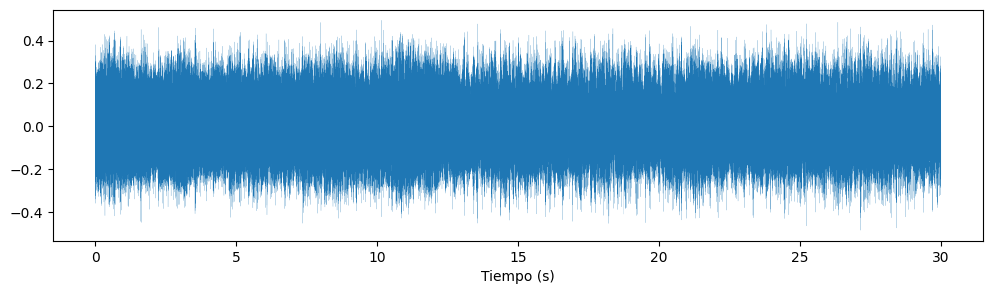

In [5]:
x, sr = sf.read('../Data/genres_original/metal/metal.00000.wav')
print("Frecuencia de muestreo:",sr)
print("Duración de la señal:",len(x)/sr)

t = np.arange(len(x)) / sr
plt.figure(figsize=(12, 3))
plt.plot(t, x, lw=0.1)  # use 'lw' (linewidth) instead of 'wh'
plt.xlabel('Tiempo (s)')

Audio(x, rate=sr)

Frecuencia de muestreo: 22050
Duración de la señal: 30.013333333333332


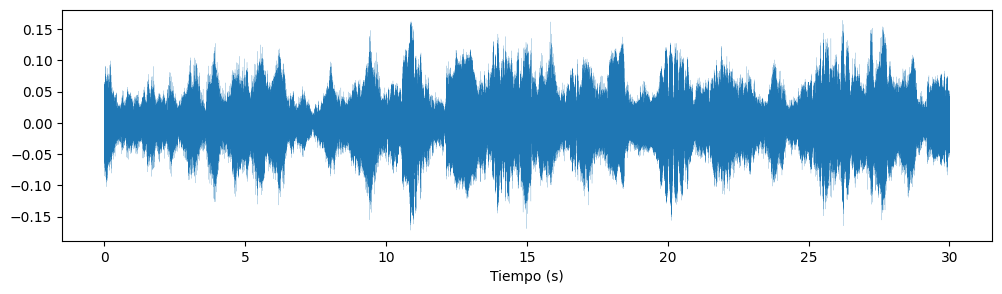

In [6]:
x, sr = sf.read('../Data/genres_original/classical/classical.00001.wav')
print("Frecuencia de muestreo:",sr)
print("Duración de la señal:",len(x)/sr)

t = np.arange(len(x)) / sr
plt.figure(figsize=(12, 3))
plt.plot(t, x, lw=0.1)  # use 'lw' (linewidth) instead of 'wh'
plt.xlabel('Tiempo (s)')

Audio(x, rate=sr)

## Posibles atributos

### Mel espectrograma

(80, 3009)


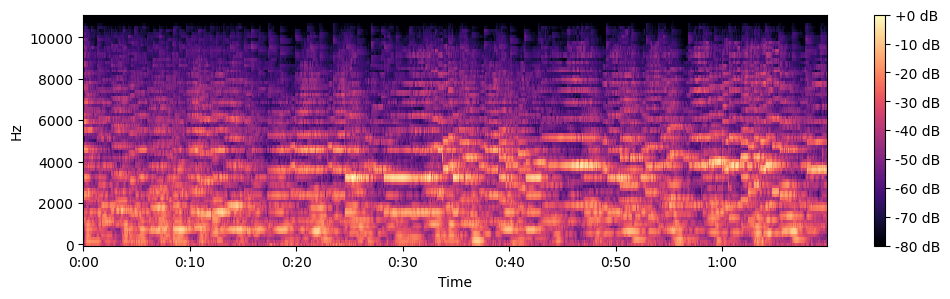

In [7]:
hop_length = int(sr * 0.01)  # 10 ms hop length
win_length = int(sr * 0.03)  # 30 ms window length

melspec = librosa.feature.melspectrogram(y=x, sr=sr, hop_length=hop_length, win_length=win_length, n_mels=80)
melspec_db = librosa.power_to_db(melspec, ref=np.max)
fig, ax = plt.subplots(figsize=(12, 3))

img = librosa.display.specshow(melspec_db, sr=sr, x_axis='time', y_axis='linear', ax=ax)
fig.colorbar(img, ax=ax, format="%+2.0f dB")
print(melspec.shape)

### MFCCs + Delta + Delta-Delta
MFCCs con sus primeras y segundas derivadas

(60, 1292)


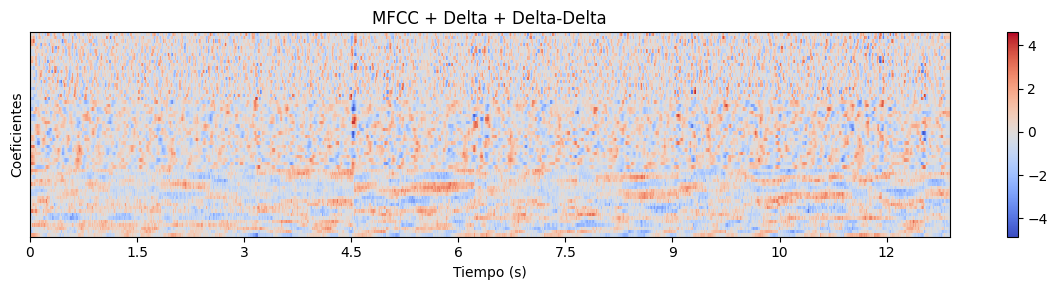

In [8]:
hop_length = int(sr * 0.01)  # 10 ms hop length
win_length = int(sr * 0.03)  # 30 ms window length

mfcc = librosa.feature.mfcc(y = x, sr=sr, n_mfcc=20, n_fft=win_length, n_mels=128, dct_type=2, norm='ortho', center=False)
mfcc_delta = librosa.feature.delta(mfcc, order=1)
mfcc_delta_delta = librosa.feature.delta(mfcc, order=2)
mfcc_combined = np.concatenate((mfcc, mfcc_delta, mfcc_delta_delta), axis=0)
mfcc_combined_norm = (mfcc_combined - np.mean(mfcc_combined, axis=1, keepdims=True)) / np.std(mfcc_combined, axis=1, keepdims=True)
print(mfcc_combined_norm.shape)

plt.figure(figsize=(12, 3))
librosa.display.specshow(mfcc_combined_norm, x_axis='time', sr=sr, hop_length=hop_length);
plt.xlabel('Tiempo (s)')
plt.ylabel('Coeficientes')
plt.title('MFCC + Delta + Delta-Delta')
plt.colorbar()
plt.tight_layout()
plt.show()

### Constant-Q power spectrum
https://arxiv.org/abs/2505.04451

(84, 1293)


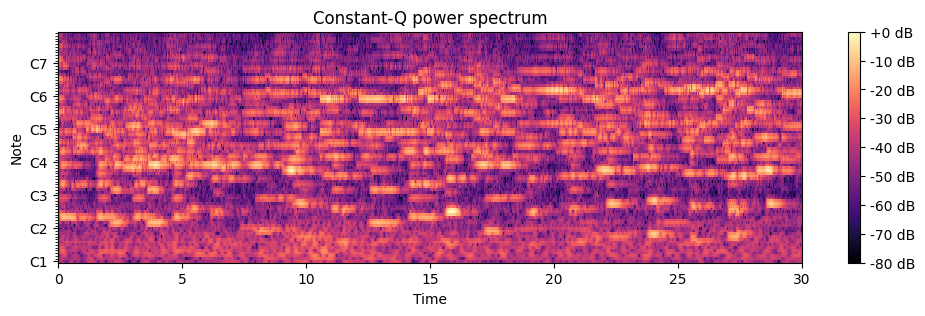

In [9]:
C = np.abs(librosa.cqt(x, sr=sr))
C_db = librosa.amplitude_to_db(C, ref=np.max)
fig, ax = plt.subplots(figsize=(12, 3))
img = librosa.display.specshow(C_db, sr=sr, x_axis='time', y_axis='cqt_note', ax=ax)
ax.set_title('Constant-Q power spectrum')
fig.colorbar(img, ax=ax, format="%+2.0f dB")
print(C.shape)